Today we are going to discuss the paper https://arxiv.org/pdf/1806.01261.pdf. They shared a library that accepts graphs as inputs. This notebook quotes their paper everywhere so I claim no originallity.

#### Human learning:

    We represent complex systems as compositions of entities and their interactions: 
    -such as judging whether a haphazard stack of objects is stable.
    
    We use hierarchies to abstract away from fine-grained differences, and capture more general
    commonalities between representations and behaviors: 
    -parts of an object, objects in a scene, neighborhoods in a town, and towns in a country.
    
    We solve novel problems by composing familiar skills and routines: 
    -for example traveling to a new location by composing familiar procedures and objectives  such as “travel by airplane”, “to San Diego”, “eat at”, and “an Indian restaurant”.
     
    We draw analogies by aligning the relational structure between two domains and drawing
    inferences about one based on corresponding knowledge about the other.

    
    "the world is compositional, or at least, we understand it in compositional terms."

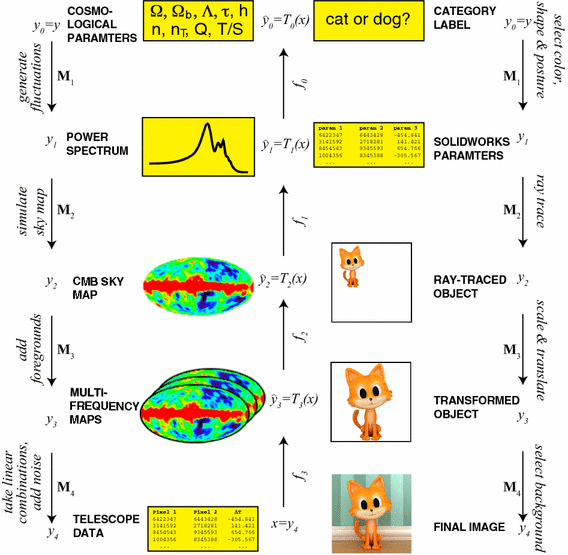

In [12]:
Image('img/deapandcheap.gif')

The previous ilustration comes from 'Why Does Deep and Cheap Learning Work So Well?'. 

This seems to be the flavour of our notebooks as well. Classic works on Combinatorial AI approaches are graphical models, relational reinforcement learning(2001), statistical relational learning(2007), etc.

There is a different approach, an end to end design (image classification, sequence to sequence approaches without using explicit parse trees or complex relationships between linguistic entities).
    
    emphasizes minimal a priory representational and computational assumptions, 
    seeks to avoid structure and hand engeneering.

Still, this end to end design have challenges when trying to do transfering learning beyond the training conditions, learning for small amounts of experience, etc. Those challenges demand combinatorial generalization!

For once we have rigid structures where you put data and finds information wihtout caring as how this data is related to each other. 

On the other hand you have flexible models where combinatorial information is exploited.

    The authors reject the notion that structure and flexibility are incompatible.

Graphs models: capacity for performing computation over discrete entities and the relations between them.


Graphs (and categories) give us a tool to study an object as well as how that object interacts in it's environment. 

We discussed how CNN can be seen as local in nature, here we have a more precise description of this locality phenomena.

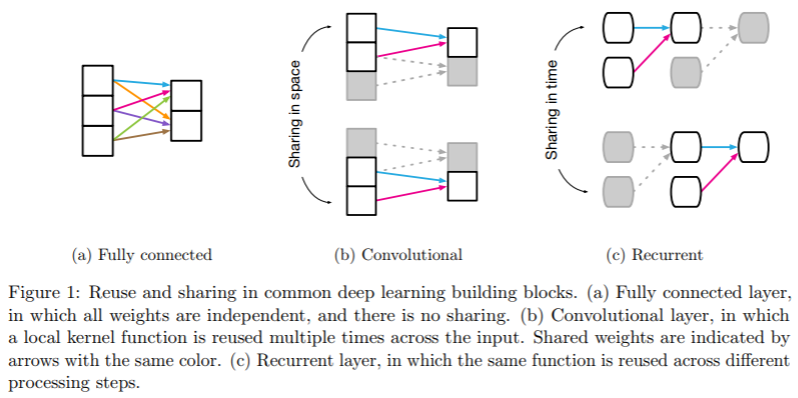

In [2]:
from IPython.display import Image
Image("img/rel.png")

Vertex: we will consider our objects (local).


Edges: we also consider relationships among the objects (relationships).


Global: a global variable that can be updated with aggregations of the vertex and edges data.

The order in which the graph networks are updated is not fixed, one possible way is as follows:

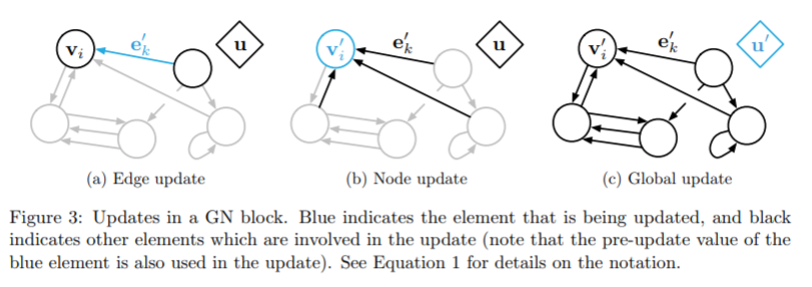

In [6]:
Image('img/updates.png')

There are auxiliary functions $\rho$ help us aggreate values. 

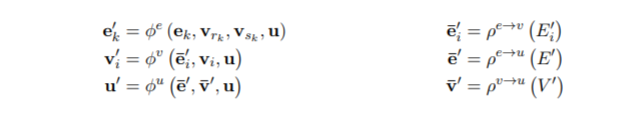

In [5]:
Image('img/GNBlock.png')

The order is:
    
    We update the edges.
    For every vertex we consider the total contribution of edges that target such vertex.
    We update every vertex.
    We consider the total contribution of vertex to the global parameter.
    We consider the total contribution of edges to the global parameter.
    We update the global parameter.

Which functions to use? why dont we train a NN to find the coefficients of those functions?

Installation
The Graph Nets library can be installed from pip.

This installation is compatible with Linux/Mac OS X, and Python 2.7 and 3.4+.

The library will work with both the CPU and GPU version of TensorFlow, but to allow for that it does not list Tensorflow as a requirement, so you need to install Tensorflow separately if you haven't already done so.

To install the Graph Nets library for CPU, run:

    $ pip install graph_nets tensorflow tensorflow_probability

To install the Graph Nets library for GPU, run:

    $ pip install graph_nets tensorflow_gpu tensorflow_probability_gpu

To see how does the program read the data take a look at their own examples:

In [9]:
# Global features for graph 0.
globals_0 = [1., 2., 3.]

# Node features for graph 0.
nodes_0 = [[10., 20., 30.],  # Node 0
           [11., 21., 31.],  # Node 1
           [12., 22., 32.],  # Node 2
           [13., 23., 33.],  # Node 3
           [14., 24., 34.]]  # Node 4

# Edge features for graph 0.
edges_0 = [[100., 200.],  # Edge 0
           [101., 201.],  # Edge 1
           [102., 202.],  # Edge 2
           [103., 203.],  # Edge 3
           [104., 204.],  # Edge 4
           [105., 205.]]  # Edge 5

# The sender and receiver nodes associated with each edge for graph 0.
senders_0 = [0,  # Index of the sender node for edge 0
             1,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             2,  # Index of the sender node for edge 3
             2,  # Index of the sender node for edge 4
             3]  # Index of the sender node for edge 5
receivers_0 = [1,  # Index of the receiver node for edge 0
               2,  # Index of the receiver node for edge 1
               3,  # Index of the receiver node for edge 2
               0,  # Index of the receiver node for edge 3
               3,  # Index of the receiver node for edge 4
               4]  # Index of the receiver node for edge 5

# Global features for graph 1.
globals_1 = [1001., 1002., 1003.]

# Node features for graph 1.
nodes_1 = [[1010., 1020., 1030.],  # Node 0
           [1011., 1021., 1031.]]  # Node 1

# Edge features for graph 1.
edges_1 = [[1100., 1200.],  # Edge 0
           [1101., 1201.],  # Edge 1
           [1102., 1202.],  # Edge 2
           [1103., 1203.]]  # Edge 3

# The sender and receiver nodes associated with each edge for graph 1.
senders_1 = [0,  # Index of the sender node for edge 0
             0,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             1]  # Index of the sender node for edge 3
receivers_1 = [0,  # Index of the receiver node for edge 0
               1,  # Index of the receiver node for edge 1
               0,  # Index of the receiver node for edge 2
               0]  # Index of the receiver node for edge 3

data_dict_0 = {
    "globals": globals_0,
    "nodes": nodes_0,
    "edges": edges_0,
    "senders": senders_0,
    "receivers": receivers_0
}

data_dict_1 = {
    "globals": globals_1,
    "nodes": nodes_1,
    "edges": edges_1,
    "senders": senders_1,
    "receivers": receivers_1
}
data_dict_list = [data_dict_0, data_dict_1]
graphs_tuple = utils_np.data_dicts_to_graphs_tuple(data_dict_list)

There are only two mandatry fields, one counting the total number of vertex and one counting the total number of edges.

Example: https://colab.research.google.com/github/deepmind/graph_nets/blob/master/graph_nets/demos/sort.ipynb#scrollTo=NRlAUqM5snzr


How to create a program that find the shortest path among two vertices in a graph.

Objects: graphs with two random edges chosen.

Labels: graphs with two edges marked and the shortest path amongh those vertex.

To train the model we give our objects to an encoder and we request the decoder to have labels.

We evaluate performance by checking how far is the label from the real solution.

So for once we care about relationships between edges by using the information of edges and vertex. 
